In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Data1.csv')
df

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323
...,...,...
95,9.6,28.420698
96,9.7,27.984652
97,9.8,30.336851
98,9.9,30.376285


In [5]:
df.insert(0,"x0",1)

In [6]:
d = 2

In [7]:
x1 = df['x']
y1 = df['y']

In [8]:
df

,x0,x,y
0,1,0.1,8.298133
1,1,0.2,4.919282
2,1,0.3,4.145139
3,1,0.4,6.850788
4,1,0.5,6.375323
...,...,...,...
95,1,9.6,28.420698
96,1,9.7,27.984652
97,1,9.8,30.336851
98,1,9.9,30.376285


In [9]:
def Xi_V(index):
    return np.array((df.iloc[index][: d],)).T

In [10]:
def Xi_T_V(index):
    return np.array((df.iloc[index][: d],))

In [11]:
def Yi(index):
    return np.array(df.iloc[index][d:d + 1])

In [12]:
def XiYi_V(index):
    return Xi_V(index) * Yi(index)

In [13]:
zero_vector = np.array([[0.]*d]).T
zero_matrix = zero_vector*zero_vector.T

zero_matrix

array([[0., 0.],
       [0., 0.]])

In [14]:
def Sum_XiYi(df):
    s = zero_vector
    for i in range(len(df)):
        s += Xi_V(i) * Yi(i)[0]

    return s

In [15]:
def Sum_XiXiT(df):
    s = zero_matrix
    for i in range(len(df)):
        s += Xi_V(i) @ Xi_T_V(i)

    return s

In [16]:
matrix = Sum_XiXiT(df)
inverse_matrix = np.linalg.inv(matrix)
inverse_matrix

array([[ 0.04060606, -0.00606061],
       [-0.00606061,  0.00120012]])

In [17]:
w = np.matmul(inverse_matrix, Sum_XiYi(df))
w

array([[5.68078713],
       [2.38406007]])

In [18]:
def predict(X):
    return np.matmul(w.T , X)

In [19]:
def predicts(df):
    lst = []
    for i in range(len(df)):
        lst.append(list(predict(np.array((df.iloc[i][: d],)).T))[0][0])

    return np.array(lst)

In [20]:
predicted_value = np.array(predicts(df))

In [21]:
df['predicted'] = predicted_value

In [22]:
df

,x0,x,y,predicted
0,1,0.1,8.298133,5.919193
1,1,0.2,4.919282,6.157599
2,1,0.3,4.145139,6.396005
3,1,0.4,6.850788,6.634411
4,1,0.5,6.375323,6.872817
...,...,...,...,...
95,1,9.6,28.420698,28.567764
96,1,9.7,27.984652,28.806170
97,1,9.8,30.336851,29.044576
98,1,9.9,30.376285,29.282982


In [23]:
def Rss(df):
    return np.sum((df['y'] - df['predicted'])**2)

In [24]:
def Tss(df):
    return np.sum((df['y'] - np.mean(df['y']))**2)


In [25]:
def R2(df):
    return 1 - Rss(df) / Tss(df)

In [26]:
R2(df)

0.9579571905586358

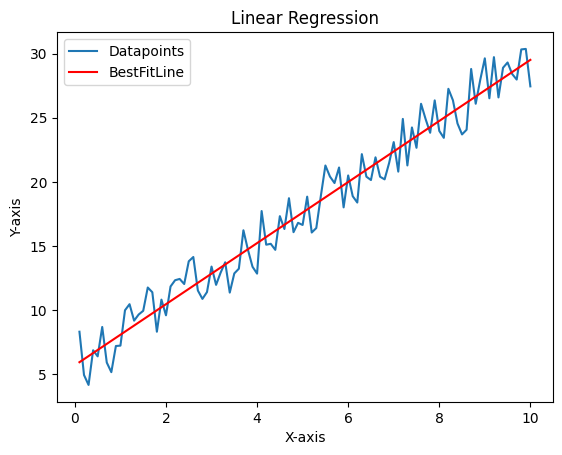

In [27]:
import matplotlib.pyplot as plt

x = x1
y = y1
y_predicted = (df['predicted'])

plt.plot(x, y, label='Datapoints')
plt.plot(x, y_predicted, label = 'BestFitLine' , color = 'Red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Standard Library

In [28]:
LR = LinearRegression()

In [29]:
X =df.drop('y', axis = 1)
X = X.drop('predicted', axis=1)
y = df['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

2      4.145139
5      8.669000
92    26.590236
33    11.351512
63    20.402730
        ...    
83    24.558274
56    19.905661
48    16.799406
76    24.902916
59    20.500412
Name: y, Length: 90, dtype: float64

In [31]:
x = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([y_train, y_test], axis=0)

In [33]:
LR.fit(X, Y )

LinearRegression()

In [35]:
Y_Cap = LR.predict(X)